<a href="https://colab.research.google.com/github/ahmedshams99/Smart-Devices-Detection/blob/master/Editing_Thermal_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!sudo apt install exiftool
!pip install flirimageextractor
!pip install loguru
import flirimageextractor
from matplotlib import cm

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libimage-exiftool-perl' instead of 'exiftool'
The following additional packages will be installed:
  libarchive-zip-perl libmime-charset-perl libposix-strptime-perl libsombok3
  libunicode-linebreak-perl
Suggested packages:
  libencode-hanextra-perl libpod2-base-perl
The following NEW packages will be installed:
  libarchive-zip-perl libimage-exiftool-perl libmime-charset-perl
  libposix-strptime-perl libsombok3 libunicode-linebreak-perl
0 upgraded, 6 newly installed, 0 to remove and 25 not upgraded.
Need to get 3,395 kB of archives.
After this operation, 20.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libarchive-zip-perl all 1.60-1ubuntu0.1 [84.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libimage-exiftool-perl all 10.80-1 [3,147 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe a

In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [8]:
!exiftool -*width* -*height* "/content/Batch 1 (1).jpg"

Exif Image Width                : 1440
Embedded Image Width            : 1440
Raw Thermal Image Width         : 640
Image Width                     : 1440
Exif Image Height               : 1080
Embedded Image Height           : 1080
Raw Thermal Image Height        : 480
Image Height                    : 1080


In [0]:
def normalizeImage(thermal):
  minThermal = np.min(np.array(thermal))
  maxThermal = np.max(np.array(thermal))
  diffThermal = maxThermal - minThermal
  thermal = (255.0/diffThermal)*(thermal - minThermal)
  thermal = thermal.astype(np.uint8)
  thermal[thermal <= 95] = 0
  print(np.min(thermal))
  return thermal

In [0]:
# def processImage(path): #Replace Red Channel with thermal view
#   flir = flirimageextractor.FlirImageExtractor()
#   flir.process_image(path)
#   rgb = flir.extract_embedded_image()
#   thermal = flir.extract_thermal_image()
#   shape = np.array(rgb).shape
#   print(shape)
#   scaleFactor = 0.81
#   thermal = normalizeImage(np.array(cv2.resize(thermal, (int(shape[1]*scaleFactor),int(shape[0]*scaleFactor)))))
#   r1, g1, b1 = cv2.split(rgb)
#   thermal = cv2.warpAffine(thermal, np.float32([[1,0,shape[1]/8],[0,1,85]]), (shape[1],shape[0]))
#   newImage = cv2.merge((thermal, g1, b1))
#   return newImage

In [0]:
# def processImage(path): #Add the Images with percenatges
#   flir = flirimageextractor.FlirImageExtractor()
#   flir.process_image(path)
#   rgb = flir.extract_embedded_image()
#   thermal = flir.extract_thermal_image()
#   shape = np.array(rgb).shape
#   scaleFactor = 0.81
#   thermal = normalizeImage(np.array(cv2.resize(thermal, (int(shape[1]*scaleFactor),int(shape[0]*scaleFactor)))))
#   r1, g1, b1 = cv2.split(rgb)
#   thermal = cv2.warpAffine(thermal, np.float32([[1,0,shape[1]/8],[0,1,85]]), (shape[1],shape[0]))
#   rgbRate = 1
#   thermalRate = 0
#   brightness = 0
#   newR = np.array(r1*rgbRate + thermal*thermalRate + brightness).astype(np.uint8)
#   newG = np.array(g1*rgbRate + thermal*thermalRate + brightness).astype(np.uint8)
#   newB = np.array(b1*rgbRate + thermal*thermalRate + brightness).astype(np.uint8)
#   newImage = cv2.merge((r1, g1, b1))
#   return newImage

In [0]:
# def processImage(path): #Fix RGB Image with CLAHE
#   flir = flirimageextractor.FlirImageExtractor()
#   flir.process_image(path)
#   rgb = flir.extract_embedded_image()
#   thermal = flir.extract_thermal_image()
#   shape = np.array(rgb).shape
#   scaleFactor = 0.81
#   thermal = normalizeImage(np.array(cv2.resize(thermal, (int(shape[1]*scaleFactor),int(shape[0]*scaleFactor)))))
#   clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
#   r1, g1, b1 = cv2.split(rgb)
#   r1 = clahe.apply(r1)
#   g1 = clahe.apply(g1)
#   b1 = clahe.apply(b1)
#   thermal = cv2.warpAffine(thermal, np.float32([[1,0,shape[1]/8],[0,1,85]]), (shape[1],shape[0]))
#   newImage = cv2.merge((r1, g1, b1))
#   return newImage

In [0]:
def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)
 
def processImage(path): #Fix RGB Image with Gamma Adjustment
  flir = flirimageextractor.FlirImageExtractor()
  flir.process_image(path)
  rgb = flir.extract_embedded_image()
  # thermal = flir.extract_thermal_image()
  # shape = np.array(rgb).shape
  # scaleFactor = 0.81
  # thermal = normalizeImage(np.array(cv2.resize(thermal, (int(shape[1]*scaleFactor),int(shape[0]*scaleFactor)))))
  # thermal = cv2.warpAffine(thermal, np.float32([[1,0,shape[1]/8],[0,1,85]]), (shape[1],shape[0]))
  return adjust_gamma(rgb, 2)

(1080, 1440, 3)


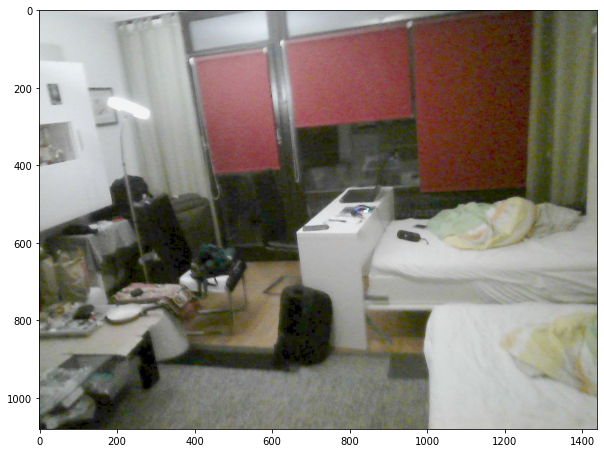

In [31]:
plt.figure(figsize=(10,10))
processedImage = processImage('/content/Batch 1 (6).jpg')
print(processedImage.shape)
plt.imshow(processedImage)
# plt.hist(processedImage[2])

                 0
count  4320.000000
mean    107.686574
std      24.032276
min      13.000000
25%      94.000000
50%     110.000000
75%     123.000000
max     179.000000
                 0
count  4320.000000
mean    107.719213
std      22.696241
min      17.000000
25%      95.000000
50%     110.000000
75%     122.000000
max     179.000000
                 0
count  4320.000000
mean    107.166898
std      22.379190
min      20.000000
25%      95.000000
50%     108.000000
75%     122.000000
max     176.000000


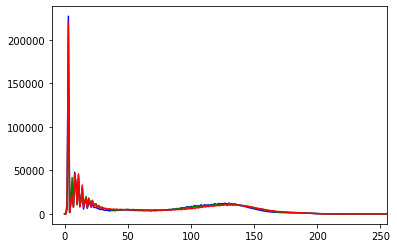

In [193]:
print(pd.DataFrame(processedImage[0].flatten()).describe())
print(pd.DataFrame(processedImage[1].flatten()).describe())
print(pd.DataFrame(processedImage[2].flatten().flatten()).describe())
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([processedImage],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([-10,255])
plt.show()